# 🚀 Real-time Multi-Model Object Classifier (Lab-14 CCA)

**Course:** Machine Learning (BSAI-462)
**Semester:** 7th Semester

This notebook is optimized for Google Colab to provide GPU acceleration and stable network for downloading model weights.

---

## 🛠️ Step 1: Install Dependencies

In [1]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.5 MB/s eta 0:00:00


In [2]:
import torch
print(f"Using Device: {'GPU (T4)' if torch.cuda.is_available() else 'CPU'}")

Using Device: GPU (T4)


## 📁 Step 2: Project Setup

Since we are in Colab, we need to create the project structure and sync the files.

**Note:** If you have already uploaded the project folder to Google Drive, you can mount it here.

In [3]:
import os

# Create directories
os.makedirs('src/camera', exist_ok=True)
os.makedirs('src/preprocessing', exist_ok=True)
os.makedirs('src/detection', exist_ok=True)
os.makedirs('src/utils', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('report', exist_ok=True)
os.makedirs('demo', exist_ok=True)

print("Project structure created!")

Project structure created!


## 🖱️ Step 3: Load Model

We will use YOLOv8-nano as it is optimized for high-speed detection.

In [4]:
# Download models manually to avoid timeout issues
!wget -nc -P /content/ https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load model
model = YOLO('yolov8n.pt')
print("Model ready for inference!")

--2026-01-05 18:56:55--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/101dd207-c6a9-4ee0-bfeb-34e12d2b8f40?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-05T19%3A45%3A25Z&rscd=attachment%3B+filename%3Dyolov8n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-05T18%3A45%3A14Z&ske=2026-01-05T19%3A45%3A25Z&sks=b&skv=2018-11-09&sig=Jd%2FbhHKiA7PCpP16puqEzpACerpy%2FoDJXXxmmjI7nY4%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NzYzOTcxNSwibmJmIjoxNzY3NjM5NDE1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iL

## 📱 Step 4: Use Mobile Device Camera

There are two main ways to use your **Mobile Camera** with Google Colab:

### Option A: Recorded Video (Best for Lab Demos)
Since Colab is in the cloud, it cannot directly see your phone on the local Wi-Fi. The easiest way to show a demo is:
1. Record a 30-60 second video of objects with your phone.
2. **Upload the video directly via the cell below.**
3. The analysis will start automatically after upload.

### Option B: Live IP Webcam (Advanced Tunneling)
To use the **IP Webcam** app live in Colab, you need a way to make your phone's local IP address visible over the internet.
1. Run a service like **Ngrok** on your laptop: `ngrok http 8080`.
2. Use the generated `https://...` address in the **Live Stream** cell below.

### ✅ Option A: Upload & Analyze Video

Please select a video file (mp4, avi, etc.) from your device:


Saving bottle-detection.gif to bottle-detection (1).gif
Starting analysis of bottle-detection (1).gif...
Processing Frame 0...


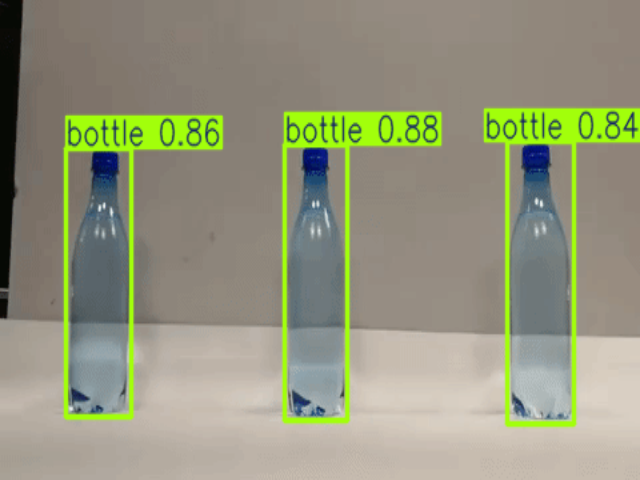

Processing Frame 30...


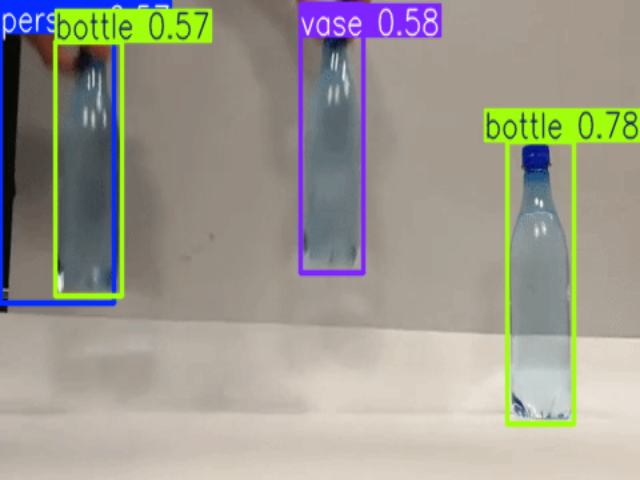

Analysis complete!


In [8]:
from google.colab import files

def analyze_mobile_video(video_path):
    if not os.path.exists(video_path):
        print(f"File {video_path} not found.")
        return

    cap = cv2.VideoCapture(video_path)
    count = 0

    print(f"Starting analysis of {video_path}...")

    while cap.isOpened() and count < 150: # Limit to 150 frames for demo
        ret, frame = cap.read()
        if not ret: break

        # Perform detection every 5th frame for speed
        if count % 5 == 0:
            results = model(frame, verbose=False)
            plotted = results[0].plot()

            # Show result in Colab
            if count % 30 == 0:
                print(f"Processing Frame {count}...")
                cv2_imshow(cv2.resize(plotted, (640, 480)))

        count += 1

    cap.release()
    print("Analysis complete!")

# Browser-based upload widget
print("Please select a video file (mp4, avi, etc.) from your device:")
uploaded = files.upload()

if uploaded:
    video_filename = list(uploaded.keys())[0]
    analyze_mobile_video(video_filename)
else:
    print("No file was uploaded.")

### 🌐 Option B: Live Stream Connection

If you have set up a tunnel (Ngrok) for your phone's IP Webcam, paste the public URL below.

In [ ]:
# Paste your tunnel URL here
TUNNEL_URL = "" # Example: "https://random-id.ngrok-free.app/video"

if TUNNEL_URL:
    cap = cv2.VideoCapture(TUNNEL_URL)
    ret, frame = cap.read()
    if ret:
        results = model(frame)
        cv2_imshow(results[0].plot())
    else:
        print("Could not connect to stream. Ensure your tunnel is active.")
else:
    print("No tunnel URL provided. Use Option A (Video Upload) or provide a URL.")

## 📝 Step 5: Final Report & Download

Run the cell below to zip and download your project files.

In [9]:
!zip -r Project_Lab14_CCA.zip . -x "venv/*" "sample_data/*"
from google.colab import files
files.download('Project_Lab14_CCA.zip')

updating: .config/ (stored 0%)
updating: .config/active_config (stored 0%)
updating: .config/default_configs.db (deflated 98%)
updating: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
updating: .config/.last_opt_in_prompt.yaml (stored 0%)
updating: .config/.last_update_check.json (deflated 22%)
updating: .config/config_sentinel (stored 0%)
updating: .config/.last_survey_prompt.yaml (stored 0%)
updating: .config/logs/ (stored 0%)
updating: .config/logs/2025.12.09/ (stored 0%)
updating: .config/logs/2025.12.09/14.41.27.893750.log (deflated 86%)
updating: .config/logs/2025.12.09/14.40.47.605300.log (deflated 92%)
updating: .config/logs/2025.12.09/14.41.18.717681.log (deflated 58%)
updating: .config/logs/2025.12.09/14.41.42.675750.log (deflated 57%)
updating: .config/logs/2025.12.09/14.41.43.412452.log (deflated 56%)
updating: .config/logs/2025.12.09/14.41.33.792924.log (deflated 58%)
updating: .config/gce (stored 0%)
updating: .config/configurations/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>